In [21]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [22]:
# load the dataset
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')


data=[Product_Description.strip() for Product_Description in data.Product_Description] # remove both the leading and the trailing characters
data=[Product_Description for Product_Description in data if Product_Description] # removes empty strings, because they are considered in Python as False
data[0:10]



['The Web DesignerÂ\x89Ã\x9bÂªs Guide to iOS (and Android) Apps, today @mention 10 a.m! {link} #sxsw',
 'RT @mention Line for iPad 2 is longer today than yesterday. #SXSW  // are you getting in line again today just for fun?',
 'Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid #sxsw eye pad too seekers.',
 'The lesson from Google One Pass: In this digital environment, users want to purchase across every platform with one tool. #sxsw #elonsxsw',
 'RT @mention At the panel: &quot;Your mom has an ipad, designing for boomers&quot; #sxsw',
 'RT @mention I think my effing hubby is in line for an #iPad 2. Can someone point him towards the line-up for wife number #2. #sxswi #sxsw',
 '&quot;Android users are not iPhone users. (They use the Options menu, and Contextual menu)&quot; ~@mention #sxsw',
 'Wow! RT@mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles',
 'Google to Launch New Social Network Called

In [25]:
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
data.tail()

Text_ID                                Product_Description  \
6359     2945  Thanks @mention for hosting this event #sxsw #...   
6360     4528  SXSW iPhone app is awesome, but iPad app crash...   
6361     6526  RT @mention RT @mention Download 20+ free trac...   
6362     2110  OH at Texas Social Media Awards: 'You don't ne...   
6363     2177  #Google launching a &quot;major&quot; new soci...   

      Product_Type  Sentiment  
6359             9          2  
6360             7          1  
6361             9          2  
6362             9          2  
6363             9          2

In [26]:
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
data.head()

Text_ID                                Product_Description  Product_Type  \
0     3057  The Web DesignerÂÃÂªs Guide to iOS (and Andr...             9   
1     6254  RT @mention Line for iPad 2 is longer today th...             9   
2     8212  Crazy that Apple is opening a temporary store ...             9   
3     4422  The lesson from Google One Pass: In this digit...             9   
4     5526  RT @mention At the panel: &quot;Your mom has a...             9   

   Sentiment  
0          2  
1          2  
2          2  
3          2  
4          2

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Text_ID              6364 non-null   int64 
 1   Product_Description  6364 non-null   object
 2   Product_Type         6364 non-null   int64 
 3   Sentiment            6364 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 199.0+ KB


In [28]:
data.describe()

Text_ID  Product_Type    Sentiment
count  6364.000000   6364.000000  6364.000000
mean   4568.862822      7.462445     2.230673
std    2621.198346      2.440492     0.638413
min       1.000000      0.000000     0.000000
25%    2297.750000      6.000000     2.000000
50%    4587.500000      9.000000     2.000000
75%    6827.500000      9.000000     3.000000
max    9092.000000      9.000000     3.000000

In [46]:
#Removed The Spaces
pattern = r"[\s]+"

data["preprocessed"] = data["Product_Description"].str.replace(pat=pattern, repl=" ", regex=True)

print(data["preprocessed"])

0       The Web DesignerÂÃÂªs Guide to iOS (and Andr...
1       RT @mention Line for iPad 2 is longer today th...
2       Crazy that Apple is opening a temporary store ...
3       The lesson from Google One Pass: In this digit...
4       RT @mention At the panel: &quot;Your mom has a...
                              ...                        
6359    Thanks @mention for hosting this event #sxsw #...
6360    SXSW iPhone app is awesome, but iPad app crash...
6361    RT @mention RT @mention Download 20+ free trac...
6362    OH at Texas Social Media Awards: 'You don't ne...
6363    #Google launching a &quot;major&quot; new soci...
Name: preprocessed, Length: 6364, dtype: object


In [3]:
# Joining the list into one string/text
data_Product_Description=' '.join(data)
data_Product_Description

"The Web DesignerÂ\x89Ã\x9bÂªs Guide to iOS (and Android) Apps, today @mention 10 a.m! {link} #sxsw RT @mention Line for iPad 2 is longer today than yesterday. #SXSW  // are you getting in line again today just for fun? Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid #sxsw eye pad too seekers. The lesson from Google One Pass: In this digital environment, users want to purchase across every platform with one tool. #sxsw #elonsxsw RT @mention At the panel: &quot;Your mom has an ipad, designing for boomers&quot; #sxsw RT @mention I think my effing hubby is in line for an #iPad 2. Can someone point him towards the line-up for wife number #2. #sxswi #sxsw &quot;Android users are not iPhone users. (They use the Options menu, and Contextual menu)&quot; ~@mention #sxsw Wow! RT@mention We interrupt your regularly scheduled #sxsw geek programming with big news {link}  #google #circles Google to Launch New Social Network Called Circles, Possibly Today {link} {

In [4]:
# remove username handles from a given Amazon Data text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
Data_tokens=tknzr.tokenize(data_Product_Description)
print(Data_tokens)


['The', 'Web', 'DesignerÂ', '\x89', 'Ã', '\x9b', 'Âªs', 'Guide', 'to', 'iOS', '(', 'and', 'Android', ')', 'Apps', ',', 'today', '10', 'a', '.', 'm', '!', '{', 'link', '}', '#sxsw', 'RT', 'Line', 'for', 'iPad', '2', 'is', 'longer', 'today', 'than', 'yesterday', '.', '#SXSW', '/', '/', 'are', 'you', 'getting', 'in', 'line', 'again', 'today', 'just', 'for', 'fun', '?', 'Crazy', 'that', 'Apple', 'is', 'opening', 'a', 'temporary', 'store', 'in', 'Austin', 'tomorrow', 'to', 'handle', 'the', 'rabid', '#sxsw', 'eye', 'pad', 'too', 'seekers', '.', 'The', 'lesson', 'from', 'Google', 'One', 'Pass', ':', 'In', 'this', 'digital', 'environment', ',', 'users', 'want', 'to', 'purchase', 'across', 'every', 'platform', 'with', 'one', 'tool', '.', '#sxsw', '#elonsxsw', 'RT', 'At', 'the', 'panel', ':', '"', 'Your', 'mom', 'has', 'an', 'ipad', ',', 'designing', 'for', 'boomers', '"', '#sxsw', 'RT', 'I', 'think', 'my', 'effing', 'hubby', 'is', 'in', 'line', 'for', 'an', '#iPad', '2', '.', 'Can', 'someone', 

In [5]:

# Again Joining the list into one string/text
data_Product_Description=' '.join(Data_tokens)
data_Product_Description



'The Web DesignerÂ \x89 Ã \x9b Âªs Guide to iOS ( and Android ) Apps , today 10 a . m ! { link } #sxsw RT Line for iPad 2 is longer today than yesterday . #SXSW / / are you getting in line again today just for fun ? Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid #sxsw eye pad too seekers . The lesson from Google One Pass : In this digital environment , users want to purchase across every platform with one tool . #sxsw #elonsxsw RT At the panel : " Your mom has an ipad , designing for boomers " #sxsw RT I think my effing hubby is in line for an #iPad 2 . Can someone point him towards the line-up for wife number # 2 . #sxswi #sxsw " Android users are not iPhone users . ( They use the Options menu , and Contextual menu ) " ~ #sxsw Wow ! RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news { link } #google #circles Google to Launch New Social Network Called Circles , Possibly Today { link } { link } #SXSW #in Welcome !

In [6]:
# Remove Punctuations 
no_punc_text=data_Product_Description.translate(str.maketrans('','',string.punctuation))
no_punc_text

'The Web DesignerÂ \x89 Ã \x9b Âªs Guide to iOS  and Android  Apps  today 10 a  m   link  sxsw RT Line for iPad 2 is longer today than yesterday  SXSW   are you getting in line again today just for fun  Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid sxsw eye pad too seekers  The lesson from Google One Pass  In this digital environment  users want to purchase across every platform with one tool  sxsw elonsxsw RT At the panel   Your mom has an ipad  designing for boomers  sxsw RT I think my effing hubby is in line for an iPad 2  Can someone point him towards the lineup for wife number  2  sxswi sxsw  Android users are not iPhone users   They use the Options menu  and Contextual menu    sxsw Wow  RT mention We interrupt your regularly scheduled sxsw geek programming with big news  link  google circles Google to Launch New Social Network Called Circles  Possibly Today  link   link  SXSW in Welcome  Enjoy Sxsw and ride anywhere in Austin for  10  dwnld 

In [7]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text


'The Web DesignerÂ \x89 Ã \x9b Âªs Guide to iOS  and Android  Apps  today 10 a  m   link  sxsw RT Line for iPad 2 is longer today than yesterday  SXSW   are you getting in line again today just for fun  Crazy that Apple is opening a temporary store in Austin tomorrow to handle the rabid sxsw eye pad too seekers  The lesson from Google One Pass  In this digital environment  users want to purchase across every platform with one tool  sxsw elonsxsw RT At the panel   Your mom has an ipad  designing for boomers  sxsw RT I think my effing hubby is in line for an iPad 2  Can someone point him towards the lineup for wife number  2  sxswi sxsw  Android users are not iPhone users   They use the Options menu  and Contextual menu    sxsw Wow  RT mention We interrupt your regularly scheduled sxsw geek programming with big news  link  google circles Google to Launch New Social Network Called Circles  Possibly Today  link   link  SXSW in Welcome  Enjoy Sxsw and ride anywhere in Austin for  10  dwnld 

In [8]:
len(no_url_text)

604389

In [9]:
# Normalize the data
lower_words=[Text.lower() for Text in no_url_text]
print(lower_words[100:200])



['i', 'p', 'a', 'd', ' ', '2', ' ', 'i', 's', ' ', 'l', 'o', 'n', 'g', 'e', 'r', ' ', 't', 'o', 'd', 'a', 'y', ' ', 't', 'h', 'a', 'n', ' ', 'y', 'e', 's', 't', 'e', 'r', 'd', 'a', 'y', ' ', ' ', 's', 'x', 's', 'w', ' ', ' ', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'i', 'n', ' ', 'l', 'i', 'n', 'e', ' ', 'a', 'g', 'a', 'i', 'n', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'j', 'u', 's', 't', ' ', 'f', 'o', 'r', ' ', 'f', 'u', 'n', ' ', ' ', 'c', 'r', 'a', 'z']


In [16]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')



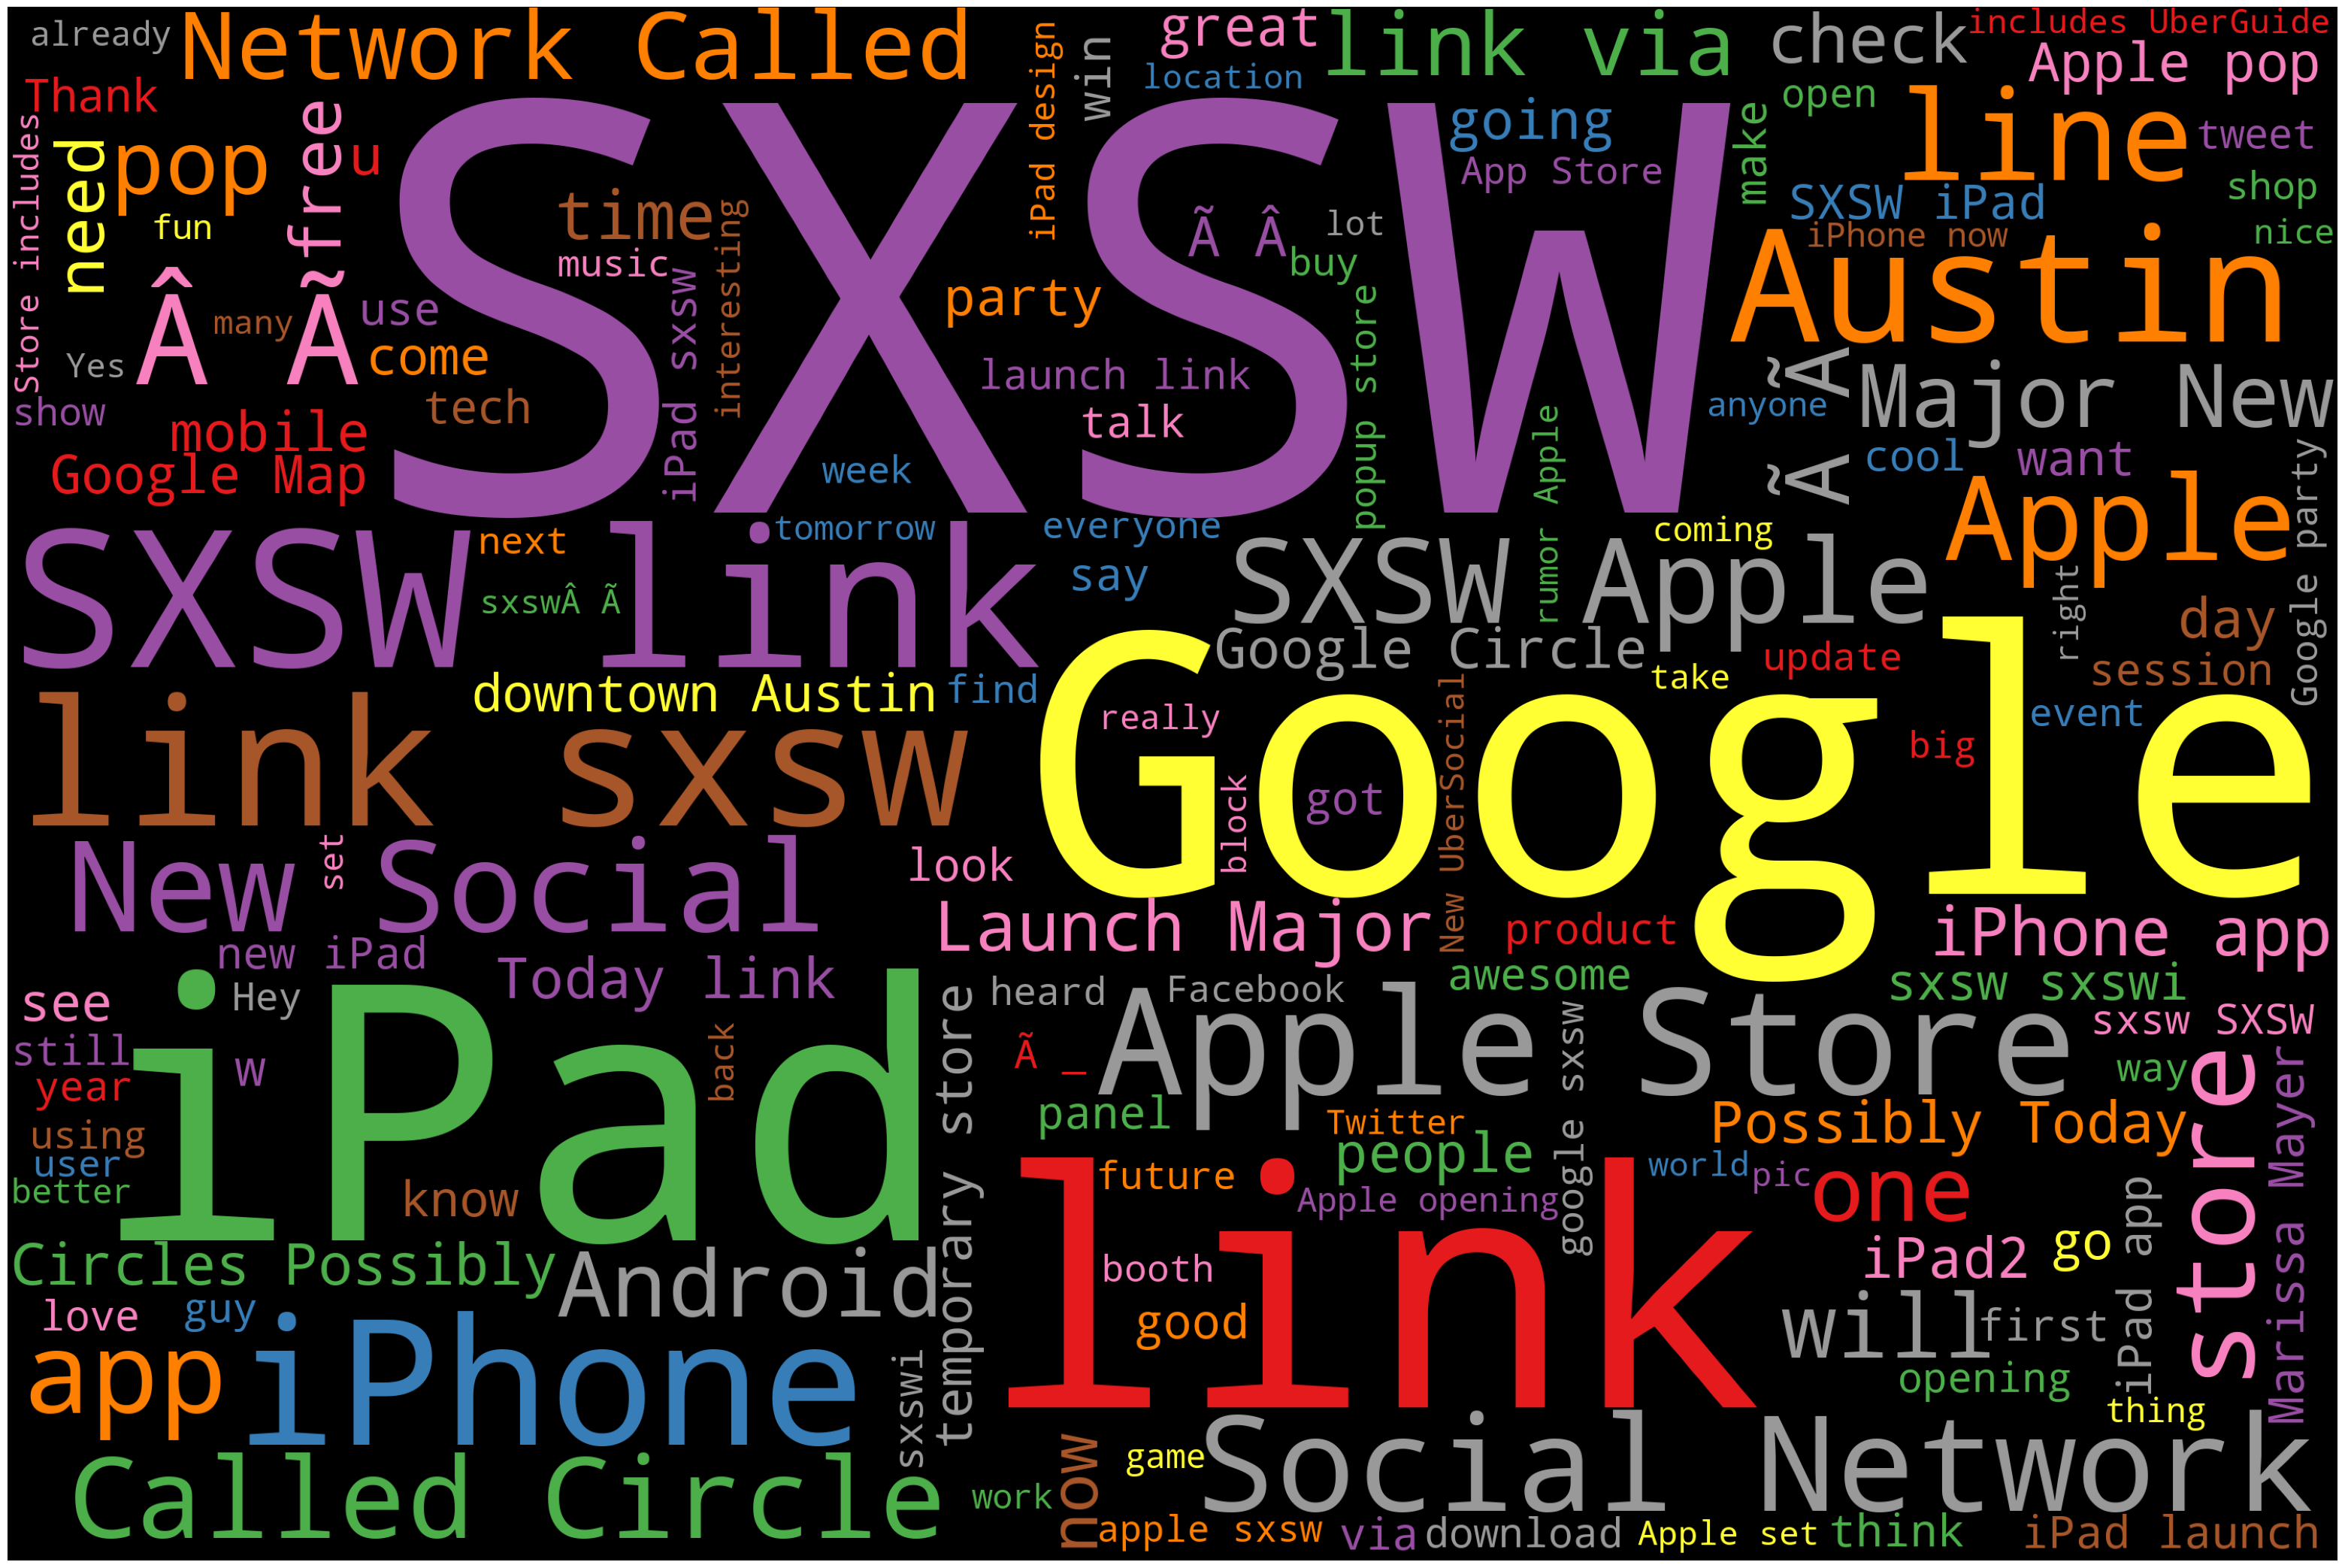

In [116]:
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=150,
                   colormap='Set1',stopwords=STOPWORDS).generate(data_Product_Description)
plot_cloud(wordcloud)


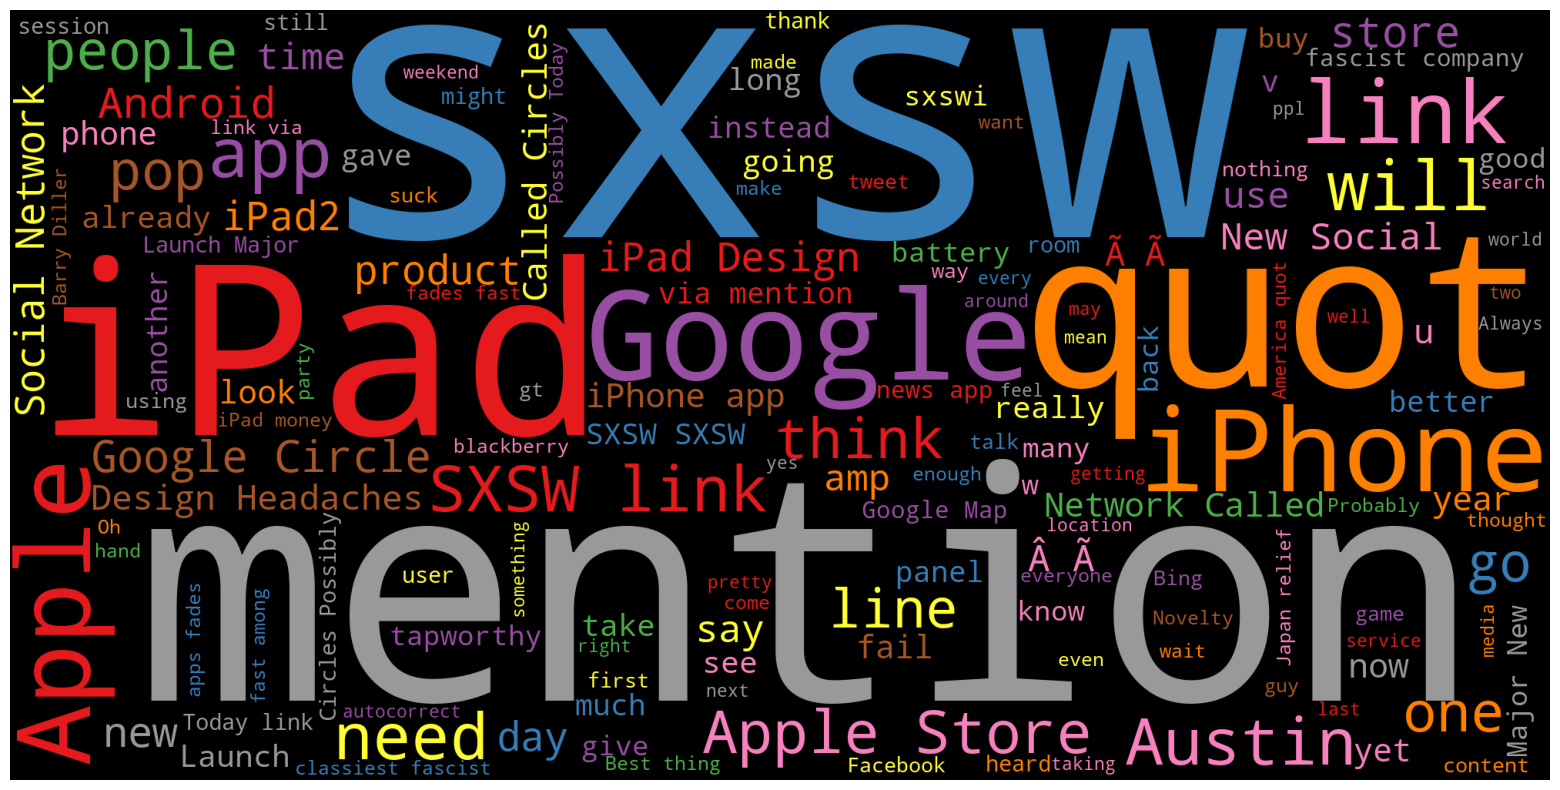

In [118]:
# Negative Word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)  
    plt.axis("off");
    
# Generate & plot wordcloud
wordcloud=WordCloud(width=2000,height=1000,background_color="Black",max_words=150,
                    colormap="Set1").generate(" ".join(data[data["Sentiment"]<=1].Product_Description))
plot_cloud(wordcloud);

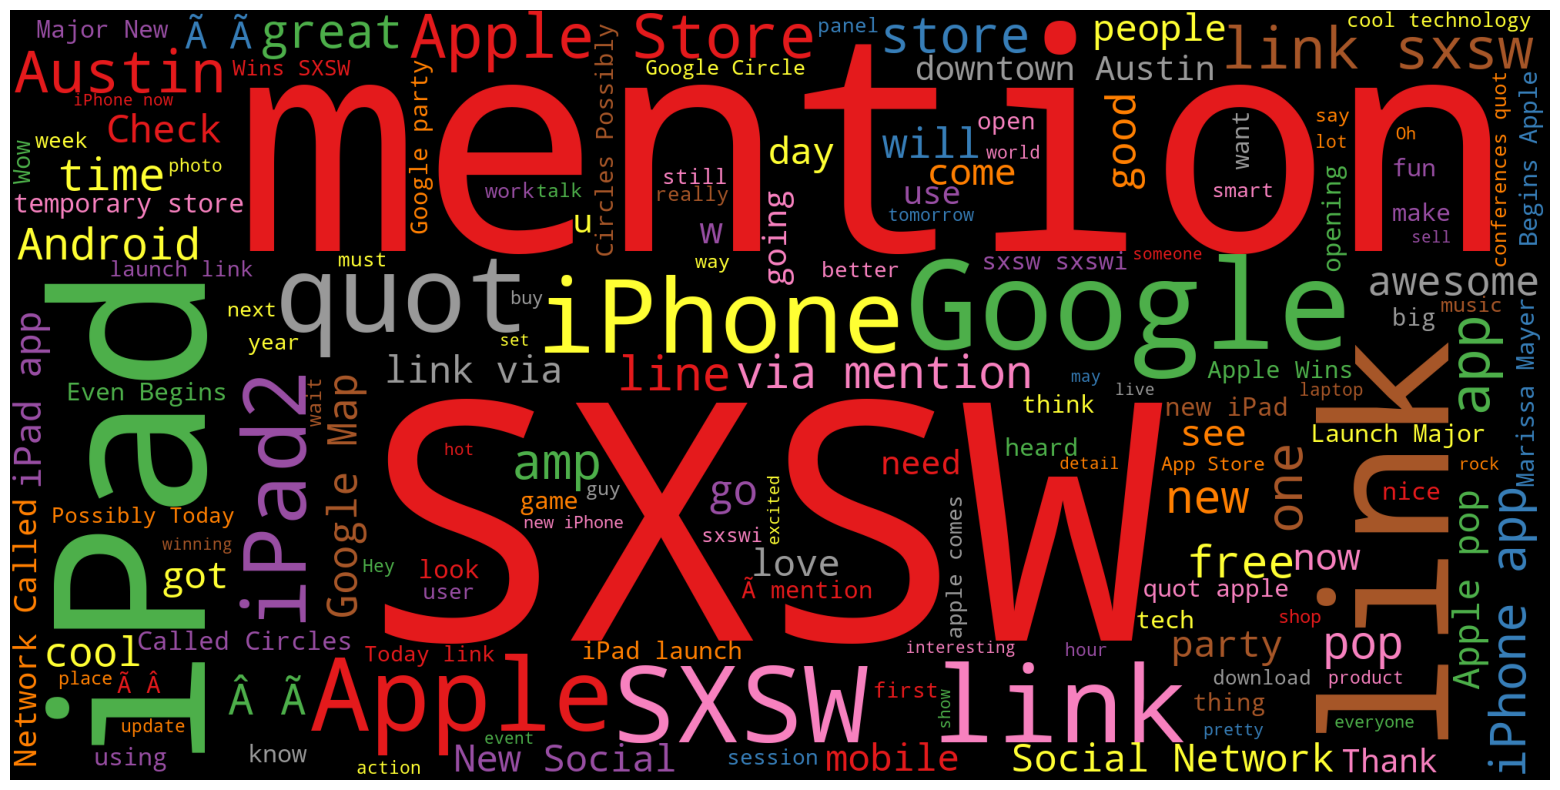

In [120]:
# Positive Word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)  
    plt.axis("off");
    
# Generate & plot wordcloud
wordcloud=WordCloud(width=2000,height=1000,background_color="black",max_words=150,
                    colormap="Set1").generate(" ".join(data[data["Sentiment"]>2].Product_Description))
plot_cloud(wordcloud);

In [20]:
## Import data visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

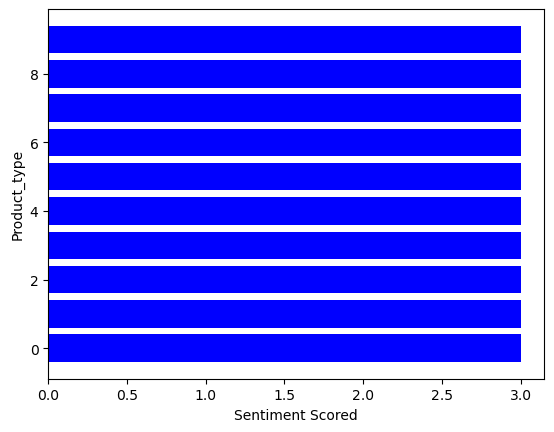

In [33]:
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
plt.barh("Product_Type", "Sentiment", data = data, color = "blue")
plt.xlabel("Sentiment Scored")
plt.ylabel("Product_type")
#plt.title("Highest goal scorers in the Premier league 2019-20 by mid-season")
plt.show()

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
data.plot.kde

<bound method PlotAccessor.kde of <pandas.plotting._core.PlotAccessor object at 0x0000022CE26BA430>>

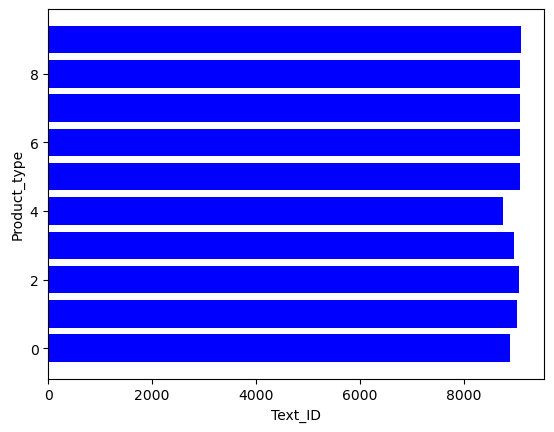

In [36]:
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
plt.barh("Product_Type", "Text_ID", data = data, color = "blue")
plt.xlabel("Text_ID")
plt.ylabel("Product_type")
#plt.title("Highest goal scorers in the Premier league 2019-20 by mid-season")
plt.show()

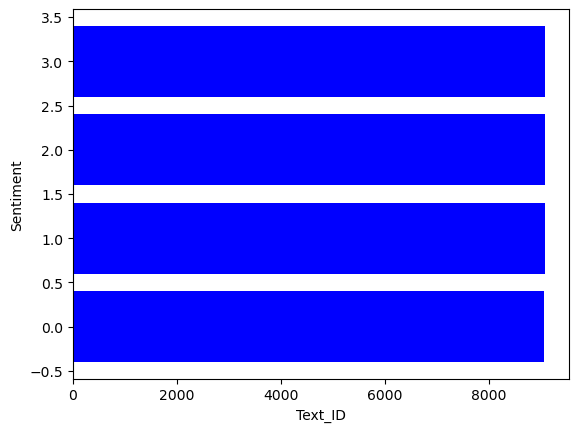

In [37]:
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
plt.barh("Sentiment", "Text_ID", data = data, color = "blue")
plt.xlabel("Text_ID")
plt.ylabel("Sentiment")
#plt.title("Highest goal scorers in the Premier league 2019-20 by mid-season")
plt.show()

In [38]:
import seaborn as sns
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
data.corr()

Text_ID  Product_Type  Sentiment
Text_ID       1.000000      0.033520  -0.004539
Product_Type  0.033520      1.000000  -0.440887
Sentiment    -0.004539     -0.440887   1.000000

<AxesSubplot:>

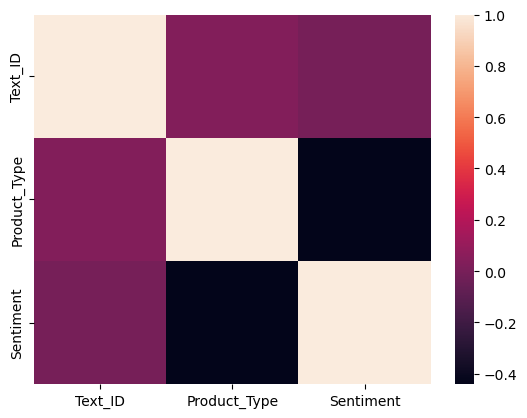

In [39]:
sns.heatmap(data.corr())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

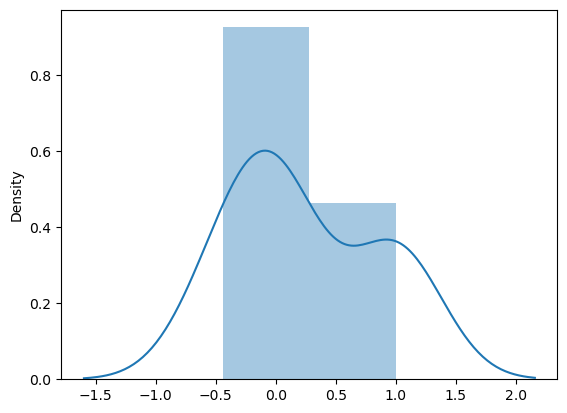

In [40]:
sns.distplot(data.corr())

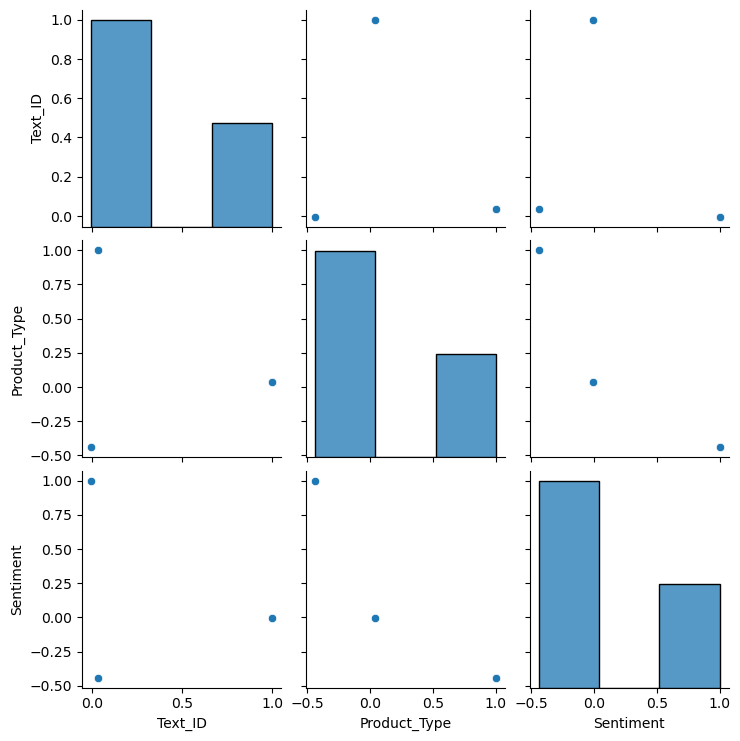

In [41]:
sns.pairplot(data.corr())

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: If using all scalar values, you must pass an index

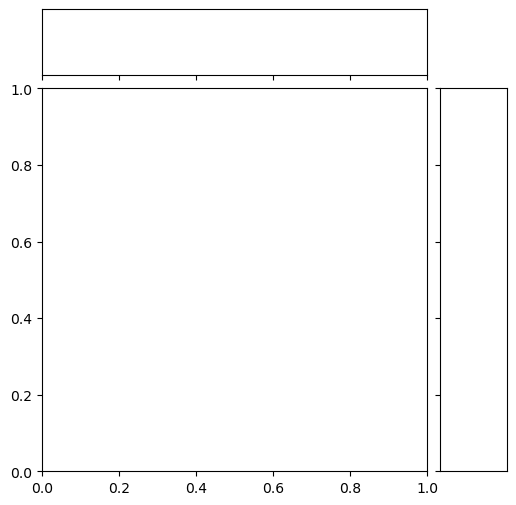

In [56]:
sns.jointplot(data.corr())

In [63]:
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
data.mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_68100\1761840349.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Text_ID         4568.862822
Product_Type       7.462445
Sentiment          2.230673
dtype: float64

In [64]:
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
data.var()

C:\Users\hp\AppData\Local\Temp\ipykernel_68100\594961248.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


Text_ID         6.870681e+06
Product_Type    5.955999e+00
Sentiment       4.075708e-01
dtype: float64

In [65]:
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
data.std()

C:\Users\hp\AppData\Local\Temp\ipykernel_68100\1508569072.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


Text_ID         2621.198346
Product_Type       2.440492
Sentiment          0.638413
dtype: float64

In [48]:

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
Data_tokens=tknzr.tokenize(data_Product_Description)
print(Data_tokens)


['The', 'Web', 'DesignerÂ', '\x89', 'Ã', '\x9b', 'Âªs', 'Guide', 'to', 'iOS', '(', 'and', 'Android', ')', 'Apps', ',', 'today', '10', 'a', '.', 'm', '!', '{', 'link', '}', '#sxsw', 'RT', 'Line', 'for', 'iPad', '2', 'is', 'longer', 'today', 'than', 'yesterday', '.', '#SXSW', '/', '/', 'are', 'you', 'getting', 'in', 'line', 'again', 'today', 'just', 'for', 'fun', '?', 'Crazy', 'that', 'Apple', 'is', 'opening', 'a', 'temporary', 'store', 'in', 'Austin', 'tomorrow', 'to', 'handle', 'the', 'rabid', '#sxsw', 'eye', 'pad', 'too', 'seekers', '.', 'The', 'lesson', 'from', 'Google', 'One', 'Pass', ':', 'In', 'this', 'digital', 'environment', ',', 'users', 'want', 'to', 'purchase', 'across', 'every', 'platform', 'with', 'one', 'tool', '.', '#sxsw', '#elonsxsw', 'RT', 'At', 'the', 'panel', ':', '"', 'Your', 'mom', 'has', 'an', 'ipad', ',', 'designing', 'for', 'boomers', '"', '#sxsw', 'RT', 'I', 'think', 'my', 'effing', 'hubby', 'is', 'in', 'line', 'for', 'an', '#iPad', '2', '.', 'Can', 'someone', 

In [62]:
dataset = Data_tokens

# be sure to split sentence before feed into Dictionary
dataset = [d.split() for d in dataset]


from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(dataset)

vocabulary_keys = list(vocabulary.token2id)[0:100]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: The
ID: 1, Token: Web
ID: 2, Token: DesignerÂ
ID: 3, Token: 
ID: 4, Token: Ã
ID: 5, Token: 
ID: 6, Token: Âªs
ID: 7, Token: Guide
ID: 8, Token: to
ID: 9, Token: iOS
ID: 10, Token: (
ID: 11, Token: and
ID: 12, Token: Android
ID: 13, Token: )
ID: 14, Token: Apps
ID: 15, Token: ,
ID: 16, Token: today
ID: 17, Token: 10
ID: 18, Token: a
ID: 19, Token: .
ID: 20, Token: m
ID: 21, Token: !
ID: 22, Token: {
ID: 23, Token: link
ID: 24, Token: }
ID: 25, Token: #sxsw
ID: 26, Token: RT
ID: 27, Token: Line
ID: 28, Token: for
ID: 29, Token: iPad
ID: 30, Token: 2
ID: 31, Token: is
ID: 32, Token: longer
ID: 33, Token: than
ID: 34, Token: yesterday
ID: 35, Token: #SXSW
ID: 36, Token: /
ID: 37, Token: are
ID: 38, Token: you
ID: 39, Token: getting
ID: 40, Token: in
ID: 41, Token: line
ID: 42, Token: again
ID: 43, Token: just
ID: 44, Token: fun
ID: 45, Token: ?
ID: 46, Token: Crazy
ID: 47, Token: that
ID: 48, Token: Apple
ID: 49, Token: opening
ID: 50, Token: temporary
ID: 51, Token: store


In [67]:
dataset = Data_tokens

# be sure to split sentence before feed into Dictionary
dataset = [d.split() for d in dataset]

bow = [vocabulary.doc2bow(doc) for doc in dataset]

for idx, freq in bow[3]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: , Frequency: 1


In [96]:

from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: The, Weight: 1.000


In [102]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(dataset)

Wall time: 2.52 s


In [109]:
import numpy

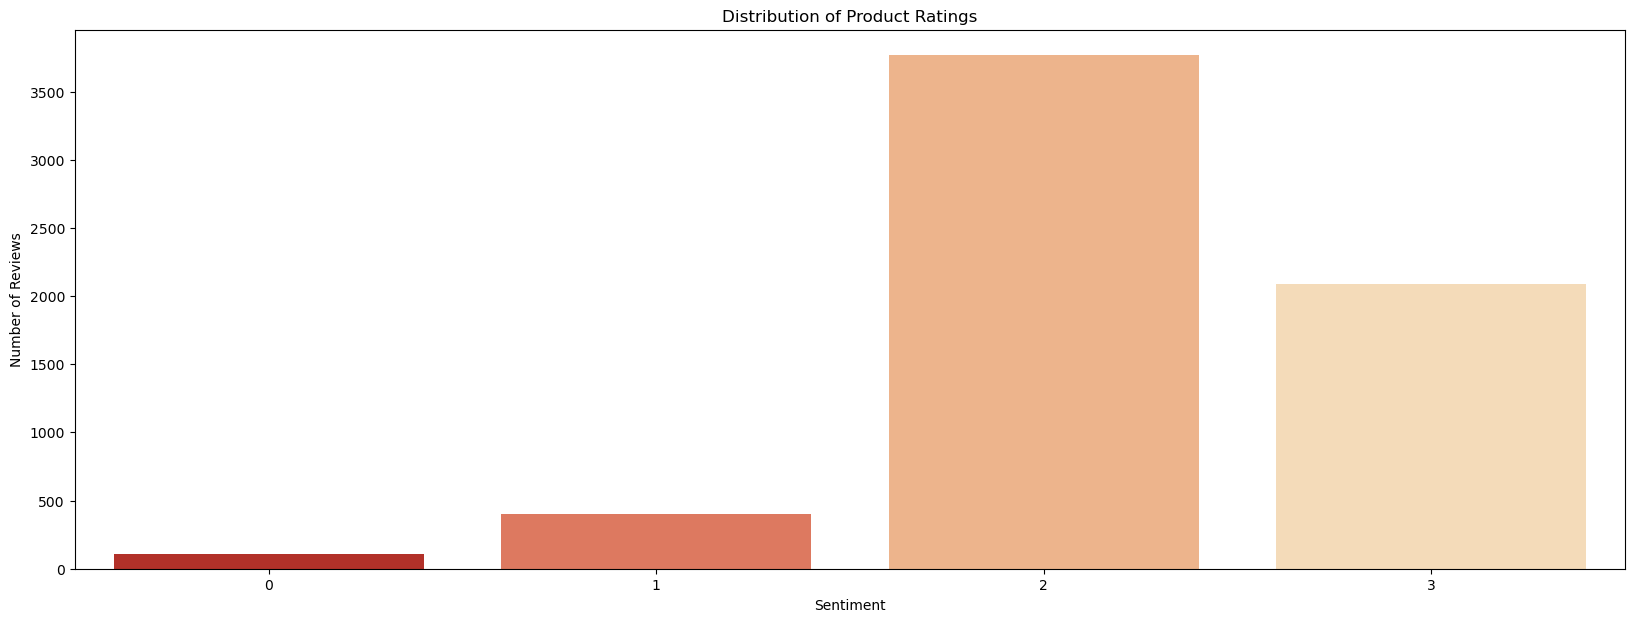

In [68]:
import seaborn as sns
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=data["Sentiment"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Sentiment", ylabel="Number of Reviews")
plt.show()

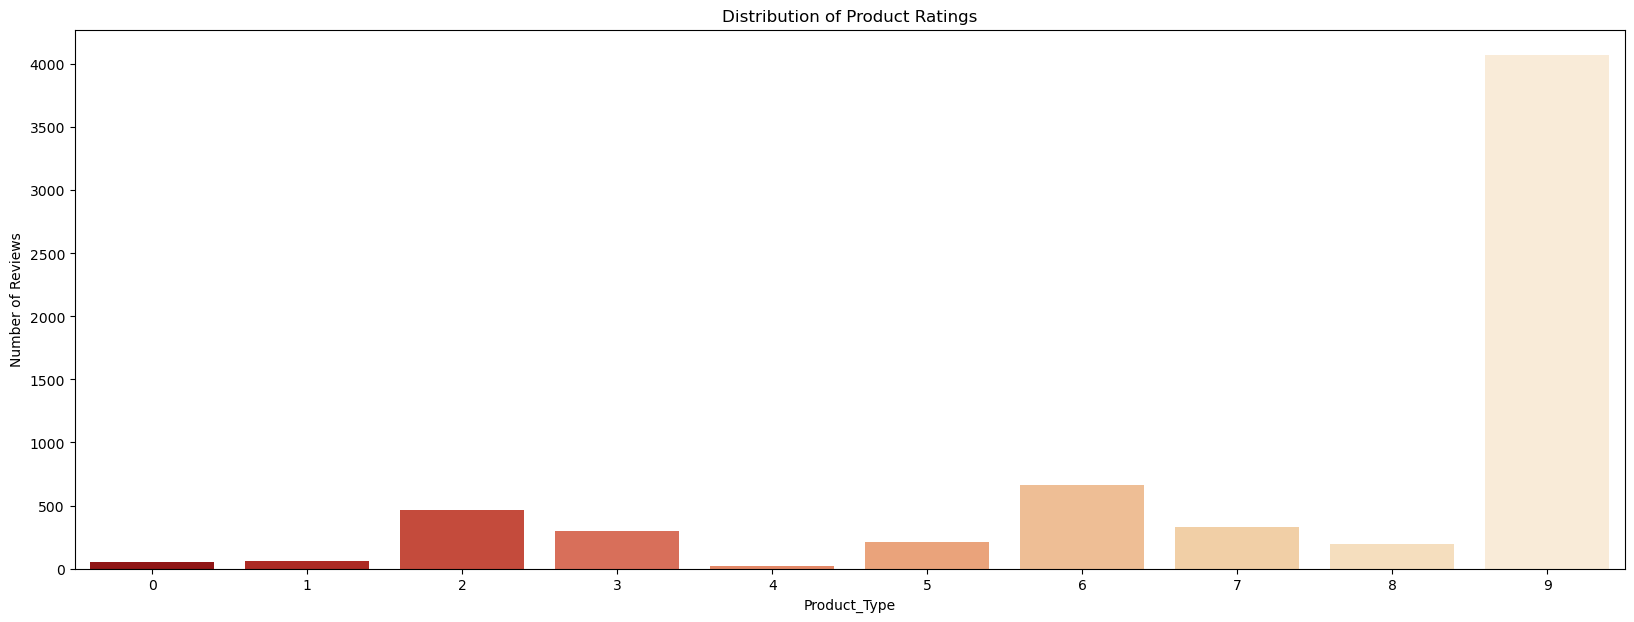

In [69]:
import seaborn as sns
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=data["Product_Type"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Product_Type", ylabel="Number of Reviews")
plt.show()

In [73]:
import seaborn as sns
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
import pandas as pd
# Define a list of models that we want to review
models = ["Sentiment","Product_Type"]

In [74]:
pd.crosstab(data.Sentiment, data.Product_Type)

Product_Type   0   1    2    3   4    5    6    7    8     9
Sentiment                                                   
0              0   0    2    1   0    0    2    0    1   105
1              4   5   69   49   0   36   84   43   65    44
2              1   1   15   10   0    6   16    8    6  3702
3             47  53  379  240  19  171  563  276  122   219

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

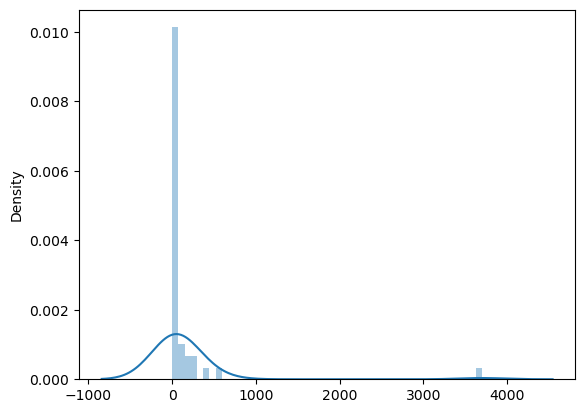

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
d=pd.crosstab(data.Sentiment, data.Product_Type)
sns.distplot(d)

In [78]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
  
# loading the dataset
# from seaborn library
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
  
# viewing the dataset
print(data.head(4))

   Text_ID                                Product_Description  Product_Type  \
0     3057  The Web DesignerÂÃÂªs Guide to iOS (and Andr...             9   
1     6254  RT @mention Line for iPad 2 is longer today th...             9   
2     8212  Crazy that Apple is opening a temporary store ...             9   
3     4422  The lesson from Google One Pass: In this digit...             9   

   Sentiment  
0          2  
1          2  
2          2  
3          2  


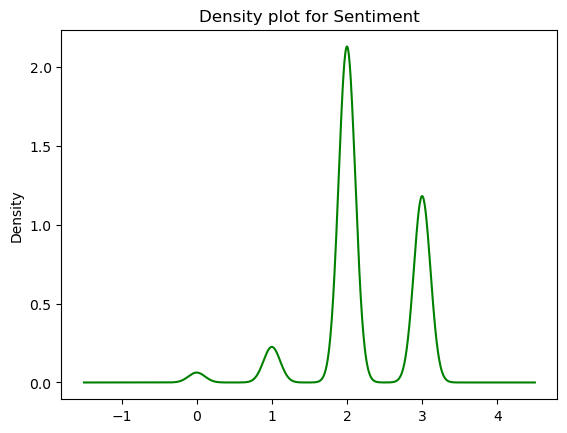

In [85]:
# plotting the density plot 
# for 'speeding' attribute
# using plot.density()
data.Sentiment.plot.density(color='green')
plt.title('Density plot for Sentiment')
plt.show()

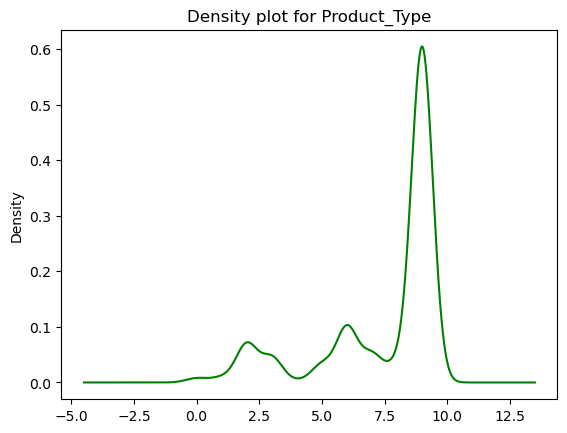

In [86]:
# plotting the density plot 
# for 'speeding' attribute
# using plot.density()
data.Product_Type.plot.density(color='green')
plt.title('Density plot for Product_Type')
plt.show()

<AxesSubplot:xlabel='Product_Type', ylabel='Sentiment'>

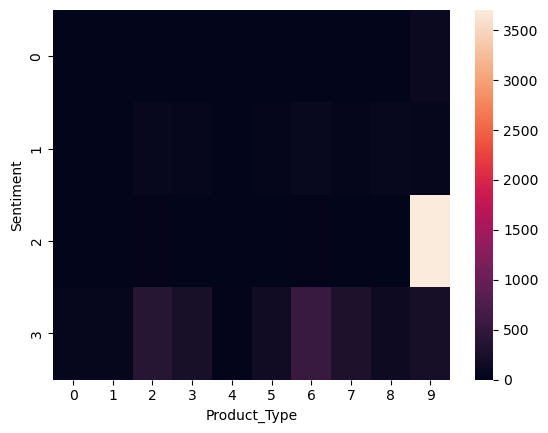

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.crosstab(data.Sentiment, data.Product_Type))

In [92]:
from sklearn.model_selection import train_test_split
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
  

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

import numpy as np
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 5)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")


Baseline Accuracy: 0.000%
Baseline F1 Score: 0.000


In [90]:
import numpy as np
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 5)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")


Baseline Accuracy: 0.000%
Baseline F1 Score: 0.000


In [ ]:
#Random Forest

In [93]:
from sklearn.model_selection import train_test_split
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')
  
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv(r'C:\Users\hp\Desktop\ExcelR\Project\Session 1\Day 1\Product_details - Copy.csv',encoding='Latin-1')

<AxesSubplot:>

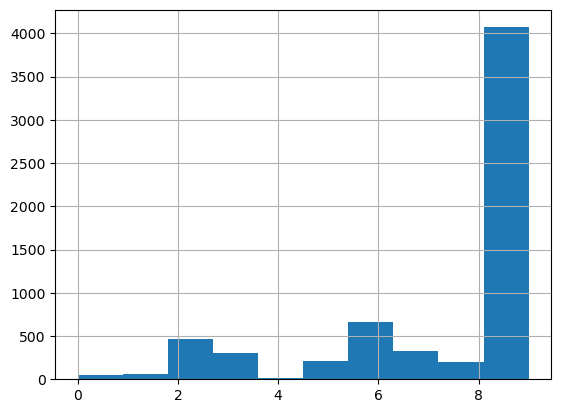

In [112]:

data['Product_Type'].hist()

<AxesSubplot:>

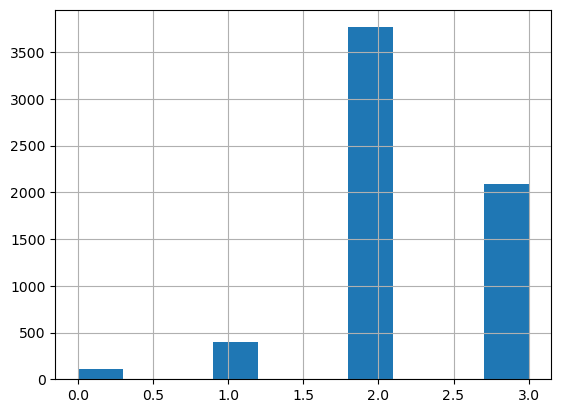

In [113]:

data['Sentiment'].hist()

In [114]:

data['Sentiment'].value_counts()

2    3765
3    2089
1     399
0     111
Name: Sentiment, dtype: int64

In [115]:

data['Product_Type'].value_counts()

9    4070
6     665
2     465
7     327
3     300
5     213
8     194
1      59
0      52
4      19
Name: Product_Type, dtype: int64